In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr


In [2]:
incidents_df = pd.read_csv("20240229-GRID_INCIDENTS.csv")

C:\Users\Samyak Corporation\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
column_and_row_mappings = {'ICat_ANA': 'Anarchist', 'ICat_Ethn': 'Ethnonationalist/Separatist', 'ICat_Iran': 'Iranian-Backed',
                           'ICat_Left': 'Left-Wing/Revolutionary Extremist', 'ICat_Right': 'Right-Wing Extremists', 'ICat_Rhbjc': 'Religious (Other - Hindu, Buddhist, Jewish, Christian)',
                           'ICat_Rjih': 'Religious (Jihadist)', 'ICat_Single': 'Single Issue', 'ICat_Unknown': 'Unknown',
                           'ICat_Vig': 'Vigilante (Pro-Government)', 'tactic_lvl1_as': 'Assault', 'tactic_lvl1_co': 'Coordinated',
                           'tactic_lvl1_cv': 'Covert', 'tactic_lvl1_ex': 'Exploitive', 'tactic_lvl1_tr': 'Trauma',
                           'tactic_lvl1_un': 'Unknown','tactic_lvl2_un_01':'Unclear tactic','tactic_lvl2_tr_01':'Gender based',
                           'tactic_lvl2_tr_02':'Executions','tactic_lvl2_tr_03':'Bodily Mutilations','tactic_lvl2_tr_04':'Suicide bombing',
                           'tactic_lvl2_tr_05':'Kidnapping','tactic_lvl2_tr_06':'Car-Ramming','tactic_lvl2_tr_07':'Hostage taking',
                           'tactic_lvl2_tr_08':'Assassinations','tactic_lvl2_tr_09':'Stabbing','tactic_lvl2_tr_10':'Hijacking',
                           'tactic_lvl2_as_01':'Shooting','tactic_lvl2_as_02':'Rapid Assault','tactic_lvl2_as_03':'Drive-by','tactic_lvl2_as_04':'Bombing',
                           'tactic_lvl2_as_05':'Unarmed Assault','tactic_lvl2_as_06':'Unknowed Armed Assault','tactic_lvl2_cv_01':'Booby-trapping',
                           'tactic_lvl2_cv_02':'Ambush', 'tactic_lvl2_cv_03':'Sabotage','tactic_lvl2_cv_04':'IEDS','tactic_lvl2_cv_05':'Infiltration',
                           'tactic_lvl2_co_01':'One Country','tactic_lvl2_co_02':'Multiple Countries','tactic_lvl2_co_03':'One Location',
                           'tactic_lvl2_co_04':'Multiple Locations','tactic_lvl2_co_05':'One Team','tactic_lvl2_co_06':'Multiple teams',
                           'tactic_lvl2_ex_01':'Foreign','tactic_lvl2_ex_02':'Female','tactic_lvl2_ex_03':'Children','tactic_lvl2_ex_04':'Illicit Trade',
                           'tactic_lvl2_ex_05':'Extortion','tactic_lvl2_ex_06':'Corruption','tactic_lvl2_ex_07':'Money Laundering','tactic_lvl2_ex_08':'Property Damage'}

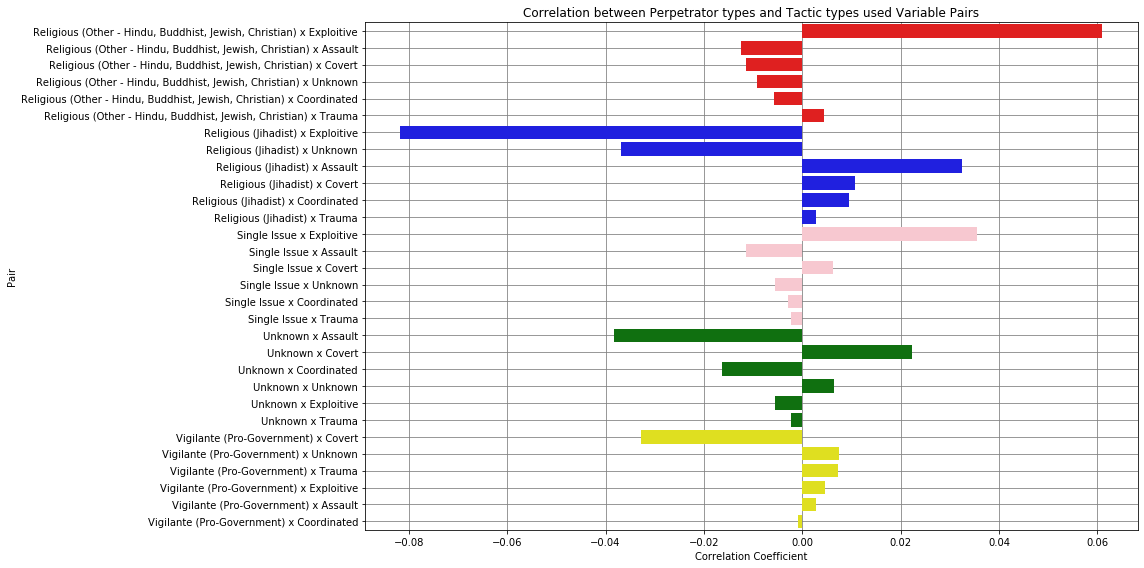

In [4]:
icat_columns = [
    'ICat_Rhbjc','ICat_Rjih','ICat_Single','ICat_Unknown','ICat_Vig'
]

tactic_columns = [
    'tactic_lvl1_as', 'tactic_lvl1_co', 'tactic_lvl1_cv',
    'tactic_lvl1_ex', 'tactic_lvl1_tr', 'tactic_lvl1_un'
]

# Color mapping for different ICat categories
color_mapping = {
    'ICat_Rhbjc': 'red',
    'ICat_Rjih': 'blue',
    'ICat_Single': 'pink',
    'ICat_Unknown': 'green',
    'ICat_Vig': 'yellow'  
}

def calculate_icat_tactic_correlations(df, icat_cols, tactic_cols):
    correlation_data = {
        'Pair': [],
        'Correlation': [],
        'P-value': [],
        'Color': [],
        'ICat_Category': []  # Add a column for ICat category for sorting purposes
    }
    for icat_col in icat_cols:
        for tactic_col in tactic_cols:
            corr, p_val = pointbiserialr(df[icat_col], df[tactic_col])
            label_icat = column_and_row_mappings.get(icat_col, icat_col)
            label_tactic = column_and_row_mappings.get(tactic_col, tactic_col)
            correlation_data['Pair'].append(f"{label_icat} x {label_tactic}")
            correlation_data['Correlation'].append(corr)
            correlation_data['P-value'].append(p_val)
            base_icat_label = icat_col.split('_')[1]
            correlation_data['Color'].append(color_mapping.get(f"ICat_{base_icat_label}", 'gray'))
            correlation_data['ICat_Category'].append(base_icat_label)  # Extract the ICat category

    return pd.DataFrame(correlation_data)

# Assume incidents_df is defined and contains the necessary data
correlation_df = calculate_icat_tactic_correlations(incidents_df, icat_columns, tactic_columns)

# Create a column with absolute correlation values
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# Sorting the data by ICat category first and then by the absolute value of Correlation values for better visualization
sorted_correlation_df = correlation_df.sort_values(by=['ICat_Category', 'Abs_Correlation'], ascending=[True, False])

# Now visualize the correlations using bar plots with custom colors
plt.figure(figsize=(16, 8))
sns.barplot(x='Correlation', y='Pair', data=sorted_correlation_df, palette=sorted_correlation_df['Color'])
plt.title('Correlation between Perpetrator types and Tactic types used Variable Pairs')
plt.xlabel('Correlation Coefficient')
plt.ylabel
plt.grid(True, which='both',color='grey', linestyle='-', linewidth=0.8, zorder=0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

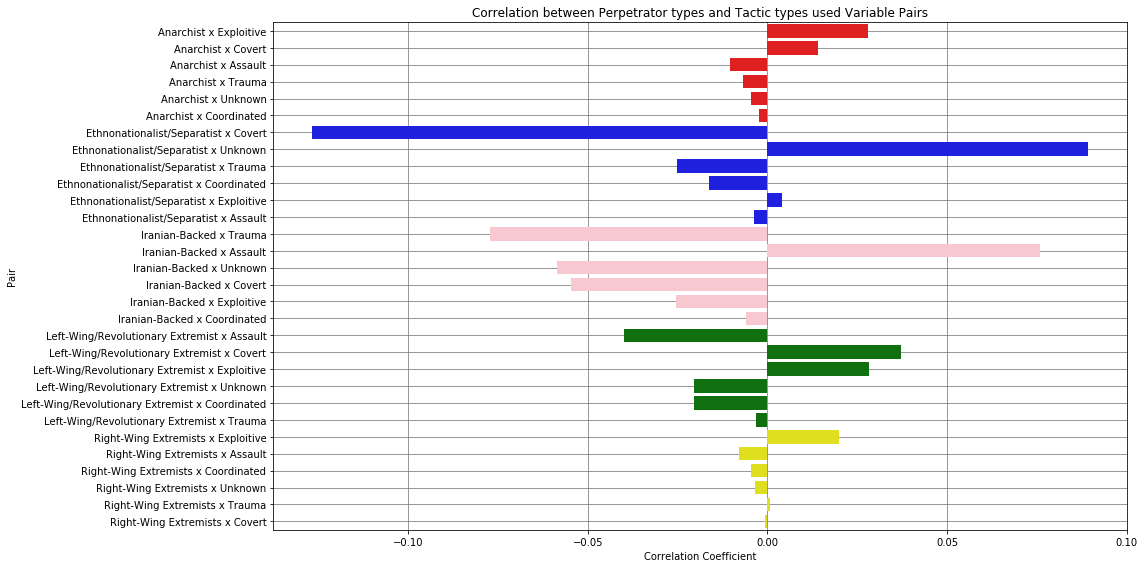

In [5]:
icat_columns = [
    'ICat_ANA', 'ICat_Ethn', 'ICat_Iran', 'ICat_Left', 'ICat_Right'
]

tactic_columns = [
    'tactic_lvl1_as', 'tactic_lvl1_co', 'tactic_lvl1_cv',
    'tactic_lvl1_ex', 'tactic_lvl1_tr', 'tactic_lvl1_un'
]

# Color mapping for different ICat categories
color_mapping = {
    'ICat_ANA': 'red',
    'ICat_Ethn': 'blue',
    'ICat_Iran': 'pink',
    'ICat_Left': 'green',
    'ICat_Right': 'yellow'  
}

def calculate_icat_tactic_correlations(df, icat_cols, tactic_cols):
    correlation_data = {
        'Pair': [],
        'Correlation': [],
        'P-value': [],
        'Color': [],
        'ICat_Category': []  # Add a column for ICat category for sorting purposes
    }
    for icat_col in icat_cols:
        for tactic_col in tactic_cols:
            corr, p_val = pointbiserialr(df[icat_col], df[tactic_col])
            label_icat = column_and_row_mappings.get(icat_col, icat_col)
            label_tactic = column_and_row_mappings.get(tactic_col, tactic_col)
            correlation_data['Pair'].append(f"{label_icat} x {label_tactic}")
            correlation_data['Correlation'].append(corr)
            correlation_data['P-value'].append(p_val)
            base_icat_label = icat_col.split('_')[1]
            correlation_data['Color'].append(color_mapping.get(f"ICat_{base_icat_label}", 'gray'))
            correlation_data['ICat_Category'].append(base_icat_label)  # Extract the ICat category

    return pd.DataFrame(correlation_data)

# Assume incidents_df is defined and contains the necessary data
correlation_df = calculate_icat_tactic_correlations(incidents_df, icat_columns, tactic_columns)

# Create a column with absolute correlation values
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# Sorting the data by ICat category first and then by the absolute value of Correlation values for better visualization
sorted_correlation_df = correlation_df.sort_values(by=['ICat_Category', 'Abs_Correlation'], ascending=[True, False])

# Now visualize the correlations using bar plots with custom colors
plt.figure(figsize=(16, 8))
sns.barplot(x='Correlation', y='Pair', data=sorted_correlation_df, palette=sorted_correlation_df['Color'])
plt.title('Correlation between Perpetrator types and Tactic types used Variable Pairs')
plt.xlabel('Correlation Coefficient')
plt.ylabel
plt.grid(True, which='both',color='grey', linestyle='-', linewidth=0.8, zorder=0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()